# Student Performance Prediction System Using Machine Learning

### Problem Type: Regression

### Goal: Predict final exam scores using academic and lifestyle features. Apply multiple regression models and compare performance.

### Target Variable: final_exam_score

## Step:1 (Import Libraries)

In [36]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Style
sns.set(style="whitegrid")  

import warnings
warnings.filterwarnings("ignore")

## Step:2 (Load Dataset)

In [8]:
df = pd.read_csv("data/student_exam_scores.csv")  
df.head()

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3


In [10]:
df.shape

(200, 6)

#### The output shows the total number of records (rows) and features (columns) present in the dataset.

In [9]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          200 non-null    object 
 1   hours_studied       200 non-null    float64
 2   sleep_hours         200 non-null    float64
 3   attendance_percent  200 non-null    float64
 4   previous_scores     200 non-null    int64  
 5   exam_score          200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.325500,6.622000,74.830000,66.800000,33.955000
std,3.227317,1.497138,14.249905,15.663869,6.789548
min,1.000000,4.000000,50.300000,40.000000,17.100000
25%,3.500000,5.300000,62.200000,54.000000,29.500000
50%,6.150000,6.700000,75.250000,67.500000,34.050000
75%,9.000000,8.025000,87.425000,80.000000,38.750000
max,12.000000,9.000000,100.000000,95.000000,51.300000


#### *The output confirms that most columns are numerical and shows whether any missing values exist.
#### *The output table shows mean, minimum, maximum, and percentile values for each numerical feature.

## Step:3 (Missing Values Handling)

In [4]:
df.isnull().sum()

student_id            0
hours_studied         0
sleep_hours           0
attendance_percent    0
previous_scores       0
exam_score            0
dtype: int64

#### Zero missing values for all columns, indicating clean data.

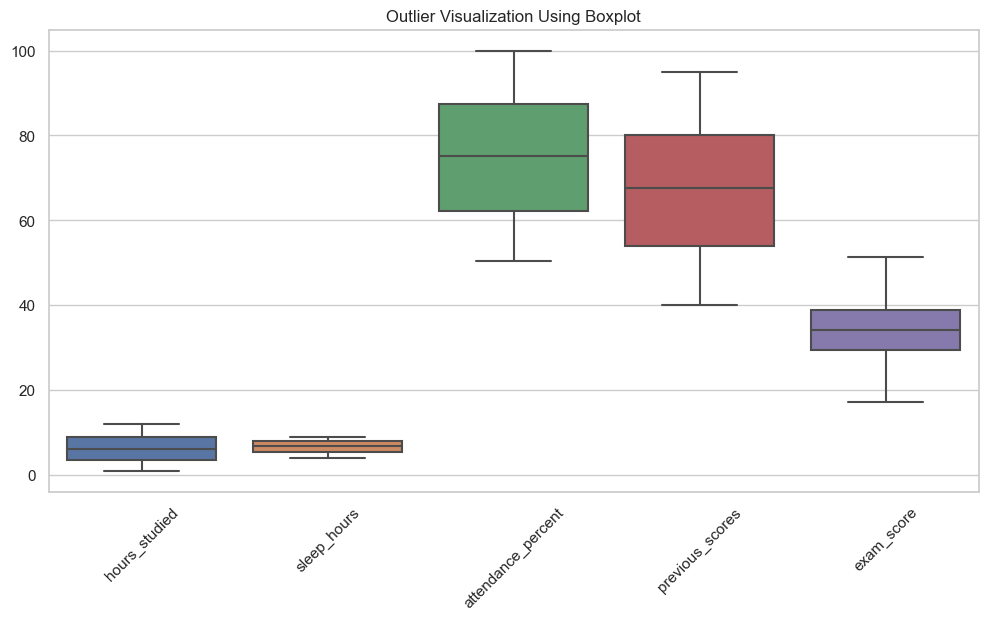

In [23]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Outlier Visualization Using Boxplot")
plt.show()

## Step:4 (Exploratory Data Analysis (EDA))

#### Feature Distributions
- Histograms are used to visualize how student data is distributed across different features.

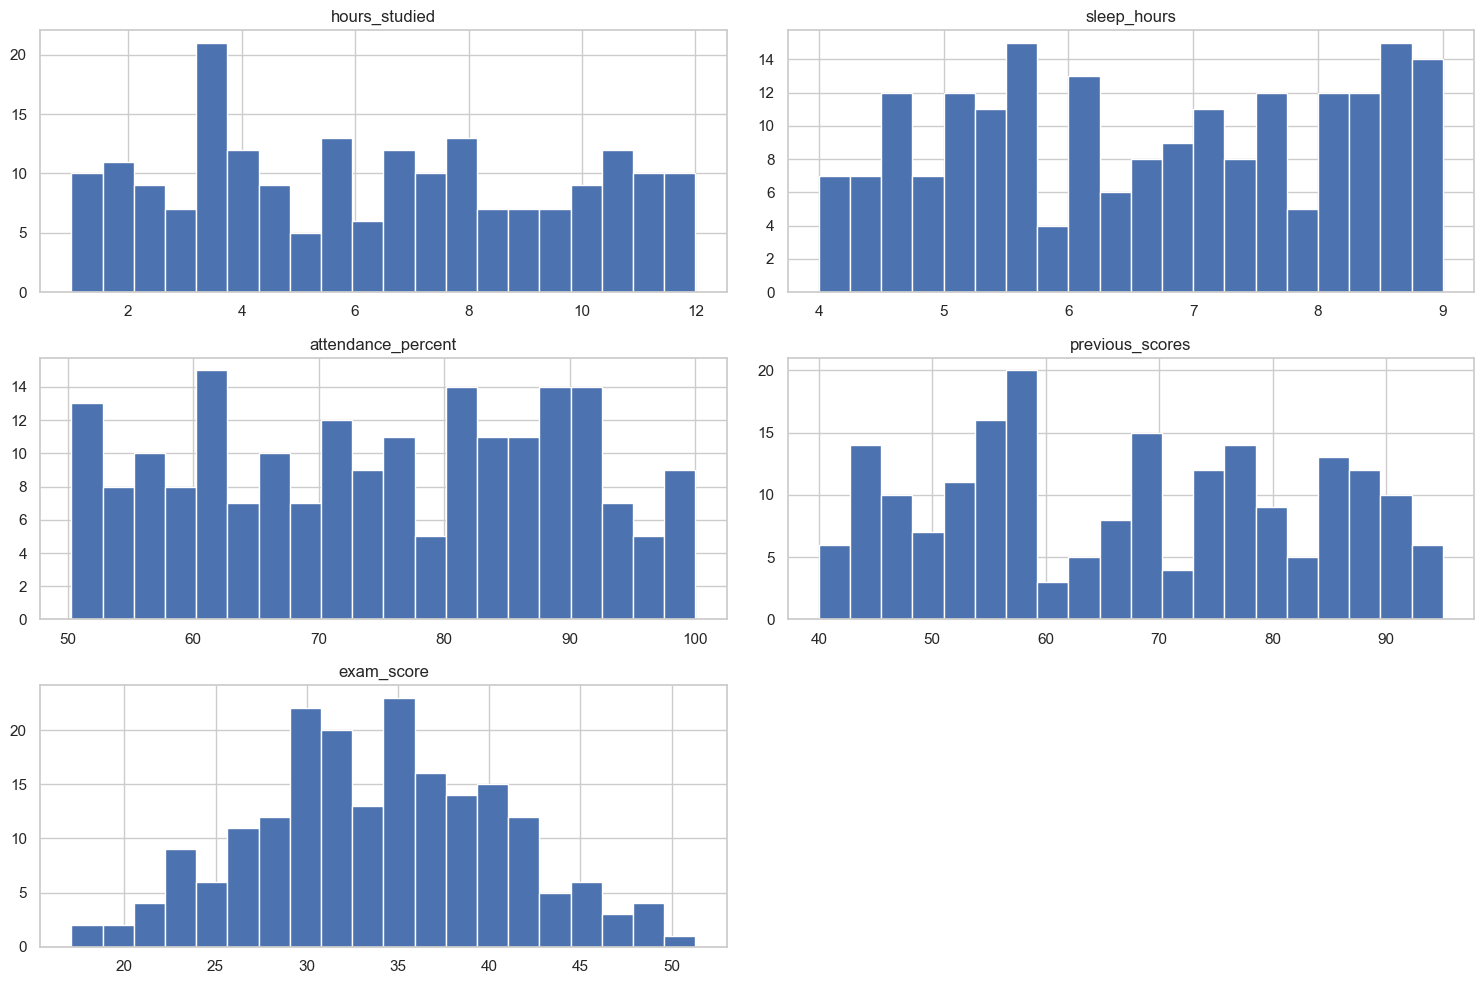

In [24]:
df.hist(figsize=(15,10), bins=20)
plt.tight_layout()
plt.show()

#### Each histogram shows the frequency of values, helping identify spread and skewness in the data.

#### Correlation Analysis
- A heatmap is used to visualize correlations between features and exam score.

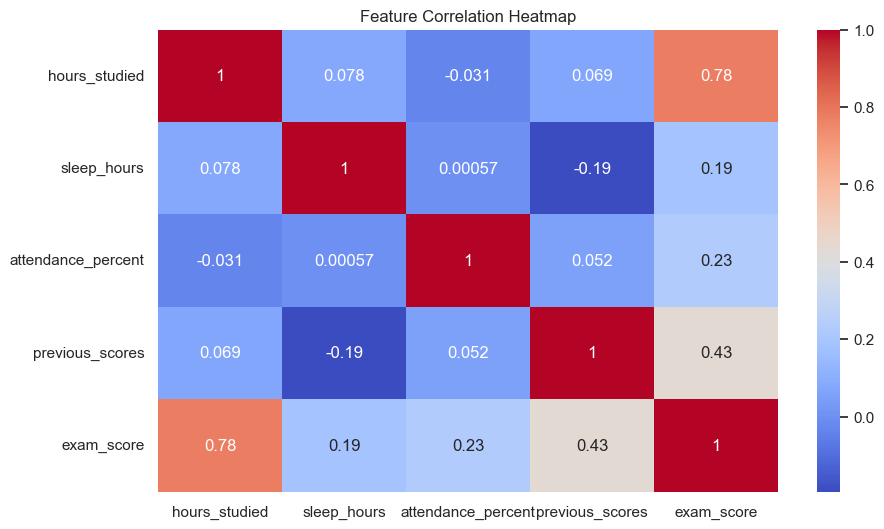

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

#### The heatmap highlights strong and weak relationships using color intensity.

#### Pairwise Relationship Map
- Pair plots are used to visualize relationships between multiple features at once.

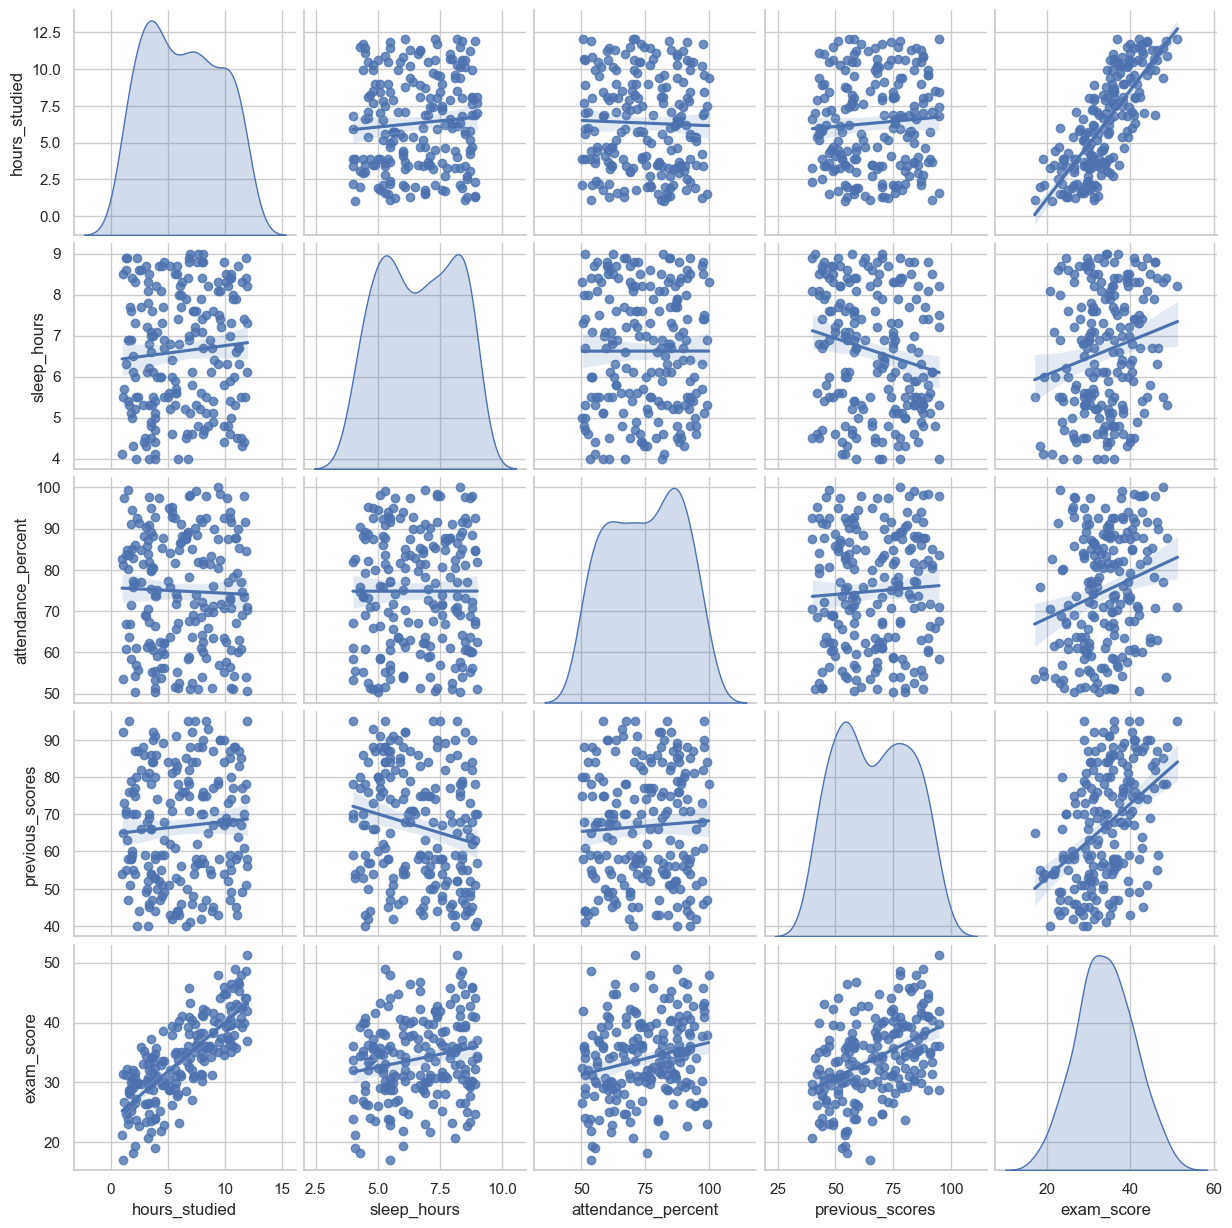

In [26]:
sns.pairplot(df, kind="reg", diag_kind="kde")
plt.show()

#### Scatter plots and regression lines show how features relate to each other and to exam score.

#### Student Performance Feature Interaction

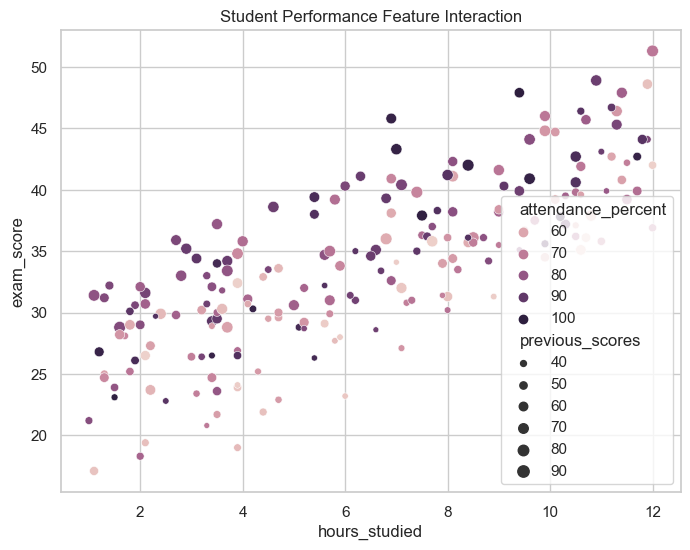

In [29]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="hours_studied",
    y="exam_score",
    hue="attendance_percent",
    size="previous_scores",
    data=df
)
plt.title("Student Performance Feature Interaction")
plt.show()

#### 3D Relationship

- Study Hours, Sleep Hours, Exam Score

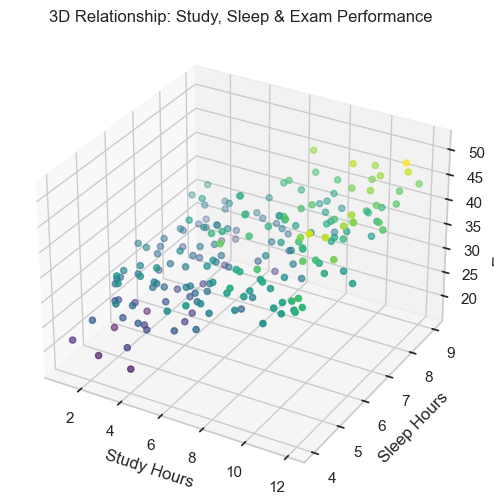

In [30]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df["hours_studied"],
    df["sleep_hours"],
    df["exam_score"],
    c=df["exam_score"],
    cmap="viridis"
)

ax.set_xlabel("Study Hours")
ax.set_ylabel("Sleep Hours")
ax.set_zlabel("Exam Score")
plt.title("3D Relationship: Study, Sleep & Exam Performance")
plt.show()

#### Impact of Sleep Levels on Exam Score

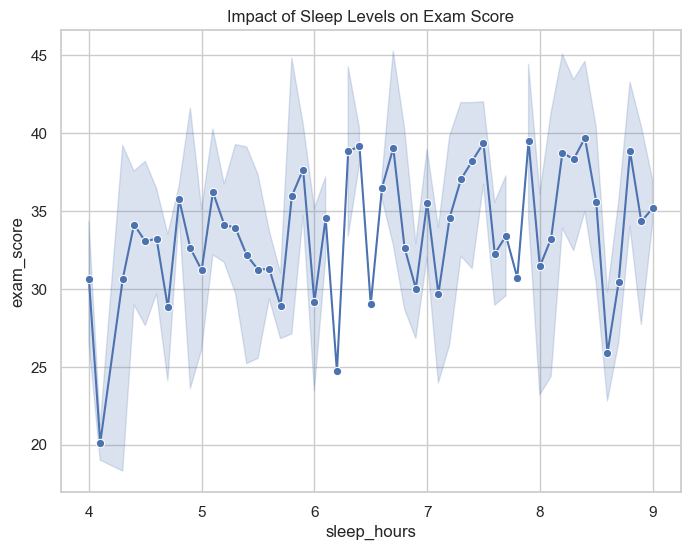

In [31]:
plt.figure(figsize=(8,6))
sns.lineplot(x="sleep_hours", y="exam_score", data=df, marker="o")
plt.title("Impact of Sleep Levels on Exam Score")
plt.show()

#### Exam Score Heatmap

- Study Hours vs Previous Score

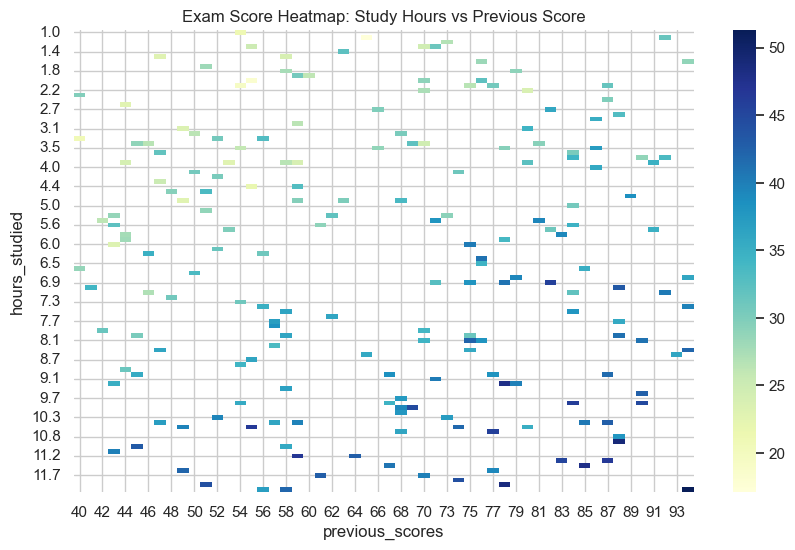

In [32]:
pivot = pd.pivot_table(
    df,
    values="exam_score",
    index="hours_studied",
    columns="previous_scores",
    aggfunc="mean"
)

plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap="YlGnBu")
plt.title("Exam Score Heatmap: Study Hours vs Previous Score")
plt.show()

#### Radar Chart

*Average Student Profile (Normalized)*

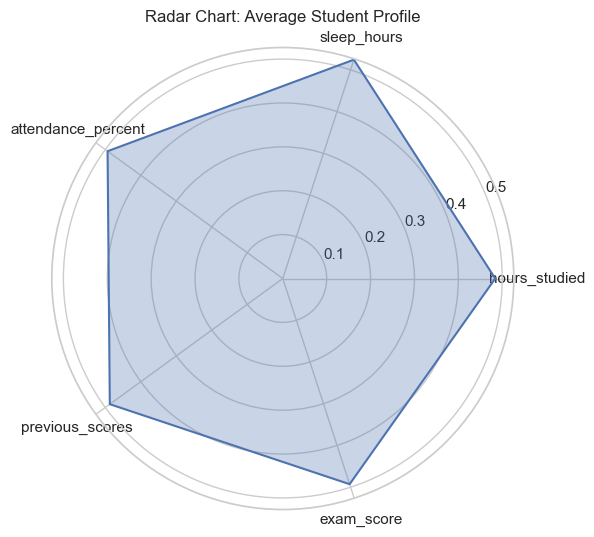

In [37]:
features = ["hours_studied", "sleep_hours", "attendance_percent", "previous_scores", "exam_score"]

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[features])

avg_profile = scaled_data.mean(axis=0)

angles = np.linspace(0, 2*np.pi, len(features), endpoint=False)
avg_profile = np.concatenate([avg_profile, [avg_profile[0]]])
angles = np.concatenate([angles, [angles[0]]])

plt.figure(figsize=(6,6))
plt.polar(angles, avg_profile)
plt.fill(angles, avg_profile, alpha=0.3)
plt.thetagrids(angles[:-1] * 180/np.pi, features)
plt.title("Radar Chart: Average Student Profile")
plt.show()

## Step:5 (Feature Engineering)

### Feature Selection
- Input features (X) and target variable (y) are separated for model training.

In [38]:
X = df.drop("exam_score", axis=1)
y = df["exam_score"]

#### X contains all predictor variables, while y contains the exam score values.

### Train-Test Split
- The dataset is split into training and testing sets to evaluate model performance.

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#### Training data is used for learning, and testing data is reserved for evaluation.

### Feature Scaling
- Numerical features are scaled to bring them to a similar range.

In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### The output consists of scaled feature values with standardized magnitude.

## Step:6 (Model Training)

### Models used:

#### -Linear Regression

#### -Lasso Regression

#### -Ridge Regression

#### -Random Forest Regressor

#### -Gradient Boosting Regressor

In [46]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=0.1),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

In [51]:
trained_models = {}

for name, model in models.items():
    if name in ["Linear Regression", "Lasso Regression", "Ridge Regression"]:
        model.fit(X_train_scaled, y_train)
    else:
        model.fit(X_train, y_train)

    trained_models[name] = model

## Step:7 (Model Evaluation & Comparison)

In [52]:
evaluation_results = []

for name, model in trained_models.items():
    if name in ["Linear Regression", "Lasso Regression", "Ridge Regression"]:
        predictions = model.predict(X_test_scaled)
    else:
        predictions = model.predict(X_test)

    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)

    evaluation_results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2
    })

#### Creating Evaluation Table

In [55]:
results_df = pd.DataFrame(evaluation_results)
results_df.sort_values(by="R2 Score", ascending=False)

,Model,MAE,MSE,RMSE,R2 Score
2,Ridge Regression,2.312413,7.760631,2.785791,0.853766
0,Linear Regression,2.310858,7.761783,2.785998,0.853745
1,Lasso Regression,2.344815,7.833476,2.798835,0.852394
3,Random Forest,2.969800,11.026394,3.320601,0.792230
4,Gradient Boosting,2.954743,12.092482,3.477425,0.772141


#### The table above compares the performance of different regression models using MAE, MSE, RMSE, and R² Score.

- **MAE (Mean Absolute Error)** shows the average prediction error.
- **MSE and RMSE** penalize larger errors and indicate prediction accuracy.
- **R² Score** shows how well the model explains the variance in exam scores (higher is better).

**Output Interpretation:**
- **Ridge Regression** achieves the highest R² score (0.8537) and one of the lowest error values.
- **Linear Regression** performs very similarly but slightly lower than Ridge Regression.
- **Lasso Regression** shows slightly higher error.
- **Random Forest** and **Gradient Boosting** perform worse in this dataset, with lower R² scores and higher errors.

#### Based on this evaluation, **Ridge Regression is the best-performing model** for predicting student exam scores in this project.

### Model Comparison Visualizations

- R² Score Comparison

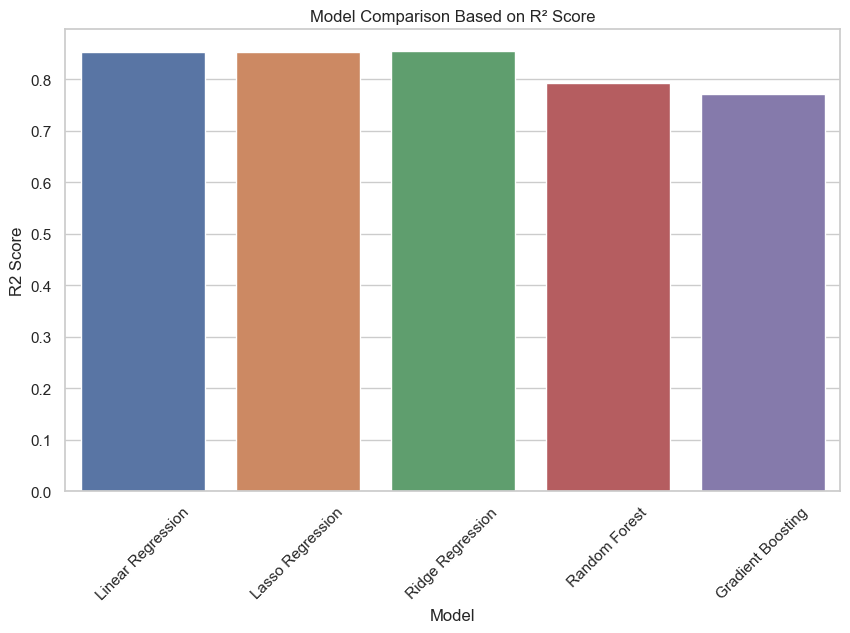

In [56]:
plt.figure(figsize=(10,6))
sns.barplot(x="Model", y="R2 Score", data=results_df)
plt.xticks(rotation=45)
plt.title("Model Comparison Based on R² Score")
plt.show()

- RMSE Comparison

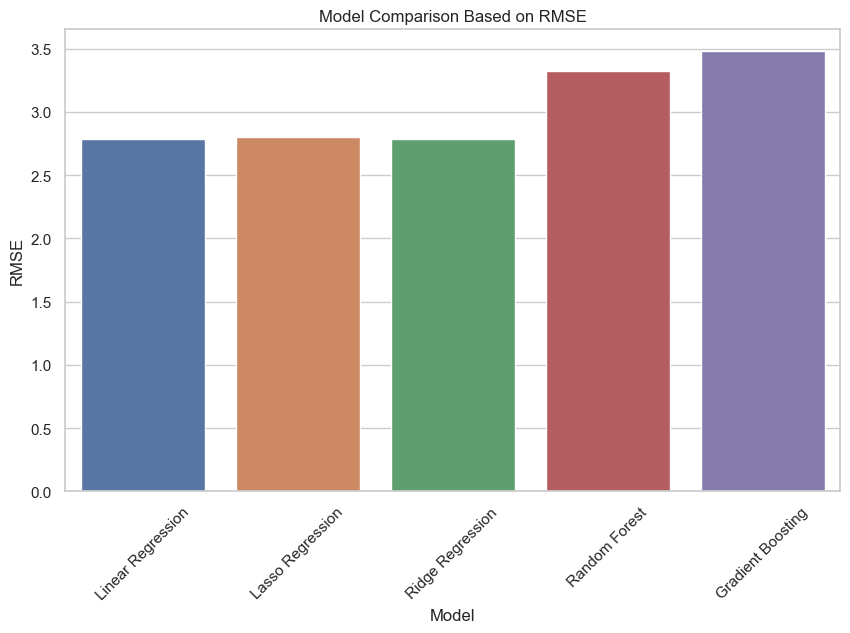

In [57]:
plt.figure(figsize=(10,6))
sns.barplot(x="Model", y="RMSE", data=results_df)
plt.xticks(rotation=45)
plt.title("Model Comparison Based on RMSE")
plt.show()

#### Graphs clearly show performance differences across models using RMSE and R² score.

## Step:8 (Select Best Model )
- The best-performing model is selected based on evaluation metrics.

In [58]:
best_model_name = results_df.sort_values(
    by="R2 Score", ascending=False
).iloc[0]["Model"]

best_model = trained_models[best_model_name]

best_model_name

'Ridge Regression'

## Step:9 (Model Saving)

In [61]:
import joblib

joblib.dump(best_model, "student_performance_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['student_performance_model.pkl']

#### Model and scaler files are successfully created in the models directory.

### Final Conclusion

This project implemented an end-to-end machine learning pipeline to predict students’ final exam scores using academic and behavioral features such as study hours, sleep hours, attendance percentage, and previous scores.

Exploratory Data Analysis (EDA) revealed that study habits and previous academic performance have a strong influence on exam scores. Multiple regression models were trained and evaluated using MAE, MSE, RMSE, and R² score.

Based on the evaluation results, **Ridge Regression** performed the best, achieving the highest R² score and lower prediction errors compared to other models. Therefore, Ridge Regression was selected as the final model.

The final output of this system is a predicted exam score for a given student profile. The selected model was saved and deployed through an interactive dashboard, allowing users to input data, view predictions, and explore performance insights through visualizations.

Overall, this project demonstrates a complete machine learning workflow from data analysis and model evaluation to deployment in a user-friendly interface.